# MashaAllah


# Training model for Fruit Classification


# Team:


*** Abdullah Anwar K173942 ***
*** Bilal Rizwan K173915 ***
*** Bilal Zubairi K173921 ***

# This is the PART TWO of the code where we do testing on Real images and Run CV algorituums

# -------------------------------------------------------

# Some Prerequisite

In [316]:
from keras.models import load_model
import matplotlib.pyplot as plt
import cv2
import numpy as np
from random import seed
from random import randint

In [3]:
model = load_model('../2.Models_Trained/fruitmodel.h5', compile=False)

In [4]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [33]:
from keras.preprocessing.image import ImageDataGenerator
test_datagen = ImageDataGenerator(rescale=1./255)
test_data_folder_path = '../../DATA/fruits-360_dataset/fruits-360/T&T/Test'
test_img_gen = test_datagen.flow_from_directory(test_data_folder_path, (100,100),batch_size=32, class_mode='categorical', shuffle=False)
dictOFfruits = test_img_gen.class_indices

Found 20622 images belonging to 120 classes.


In [318]:
from os import listdir
from os.path import isfile, join
import re
import matplotlib.image as mpimg

# locating the object in the target image

# tecnology: ComputerVision

# selection of pics area start

In [200]:
from keras.preprocessing import image

In [387]:
imgOriginal = image.load_img('../../DATA/unsplash/real_strawnarry_basket_1.jpg',target_size=(700,700))

In [388]:
img = image.load_img('../../DATA/unsplash/real_strawnarry_basket_1.jpg',target_size=(100,100))

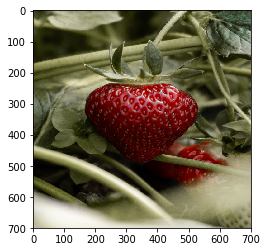

In [389]:
plt.imshow(imgOriginal)

In [390]:
img = image.img_to_array(img)
#img.shape
imgTransfrom = np.expand_dims(img,axis=0)
#imgTransfrom.shape
imgTransfrom = imgTransfrom/255

In [391]:
result = model.predict_classes(imgTransfrom)

In [392]:
print('The pridicted class is --> '+str(result[0]))

The pridicted class is --> 108


In [393]:
resultedFruitName = list(dictOFfruits.keys())[list(dictOFfruits.values()).index(result)] 
print('The pridicted class Name is --> '+resultedFruitName)

The pridicted class Name is --> Strawberry


In [412]:
seed(1)
value = randint(0, 119)

resultedFruitPath = '../../DATA/fruits-360_dataset/fruits-360/T&T/Training/'+resultedFruitName

nameOfFile = [f for f in listdir(resultedFruitPath) if isfile(join(resultedFruitPath, f))] 
randomIndexFromFile = np.random.randint(0,len(nameOfFile)) 
nameOfImg = nameOfFile[randomIndexFromFile] 
resultedFruitPath = resultedFruitPath + "/" + nameOfImg 

    
print(resultedFruitPath)

../../DATA/fruits-360_dataset/fruits-360/T&T/Training/Strawberry/r_261_100.jpg


In [413]:

resultSample = image.load_img(resultedFruitPath)

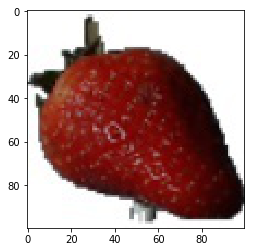

In [414]:
plt.imshow(resultSample)

# ------------------area ended----

# OpenCV Section

In [403]:
def display(img,cmap='gray'):
    fig = plt.figure(figsize=(12,10))
    ax = fig.add_subplot(111)
    ax.imshow(img,cmap='gray')

In [416]:
imgOriginal = np.array(imgOriginal)
resultSample = np.array(resultSample)

#imgOriginal = cv2.cvtColor( imgOriginal , cv2.COLOR_RGB2GRAY)
#resultSample = cv2.cvtColor( resultSample , cv2.COLOR_RGB2GRAY)

# OpenCV Algorithum

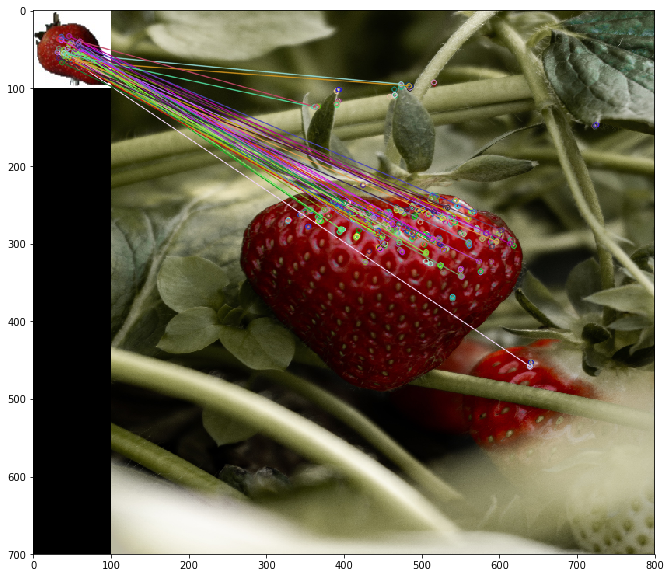

In [417]:
# Initiate ORB detector
orb = cv2.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(resultSample,None)
kp2, des2 = orb.detectAndCompute(imgOriginal,None)


# create BFMatcher object
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors.
matches = bf.match(des1,des2)

# Sort them in the order of their distance.
matches = sorted(matches, key = lambda x:x.distance)

#Do Not Draw first 25 matches.
reeses_matches = cv2.drawMatches(resultSample,kp1,imgOriginal,kp2,matches,None,flags=0)

display(reeses_matches)

# below are some method that actually did not work prity well

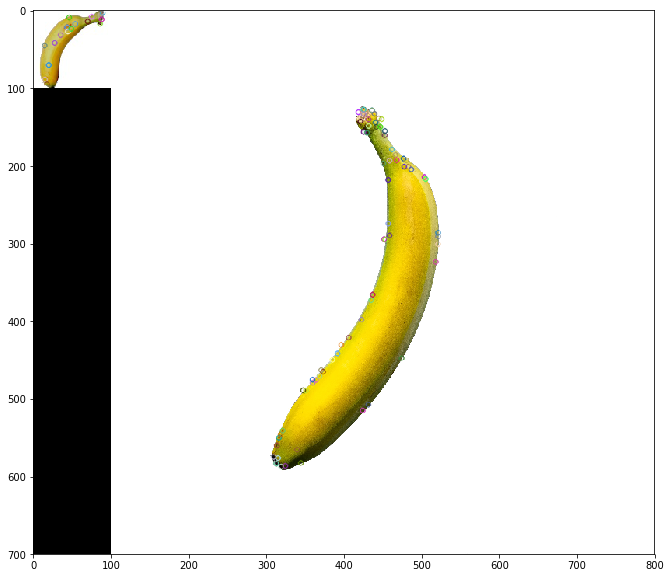

In [145]:
# Create SIFT Object
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(resultSample,None)
kp2, des2 = sift.detectAndCompute(imgOriginal,None)

# BFMatcher with default params
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1,des2, k=10)

# Apply ratio test
good = []
for match1,match2,match3,match4,match5,match6,match7,match8,match9,match10 in matches:
    if match1.distance < 0.01*match2.distance:
        good.append([match1])
        good.append([match2])
        good.append([match3])
        good.append([match4])
        good.append([match5])
        good.append([match6])
        good.append([match7])
        good.append([match8])
        good.append([match9])
        good.append([match10])

# cv2.drawMatchesKnn expects list of lists as matches.
sift_matches = cv2.drawMatchesKnn(resultSample,kp1,imgOriginal,kp2,good,None,flags=0)

display(sift_matches)

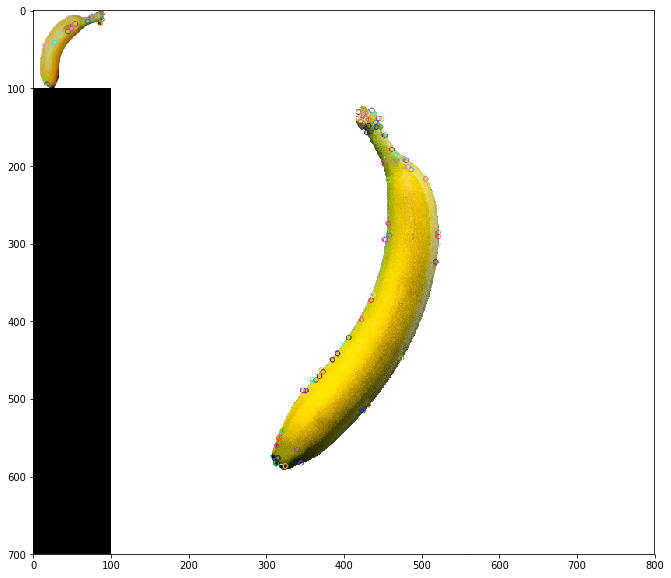

In [140]:
# Initiate SIFT detector
sift = cv2.xfeatures2d.SIFT_create()

# find the keypoints and descriptors with SIFT
kp1, des1 = sift.detectAndCompute(resultSample,None)
kp2, des2 = sift.detectAndCompute(imgOriginal,None)

# FLANN parameters
FLANN_INDEX_KDTREE = 0
index_params = dict(algorithm = FLANN_INDEX_KDTREE, trees = 5)
search_params = dict(checks=50)  

flann = cv2.FlannBasedMatcher(index_params,search_params)

matches = flann.knnMatch(des1,des2,k=2)

good = []

# ratio test
for i,(match1,match2) in enumerate(matches):
    if match1.distance < 0.7*match2.distance:
        
        good.append([match1])


flann_matches = cv2.drawMatchesKnn(resultSample,kp1,imgOriginal,kp2,good,None,flags=0)

display(flann_matches)